# Clustering

In [61]:
import matplotlib.pyplot as plt
import numpy as np

from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans


In [62]:
import findspark
findspark.init(r"C:\python311\Lib\site-packages\pyspark")

In [63]:
def generate_cluster_data(n_samples=300, n_features=2, n_clusters=3, cluster_std=0.8, random_state=42):
    """
    Generate synthetic data for clustering algorithms using NumPy.

    Parameters:
    - n_samples: total number of data points
    - n_features: number of dimensions (features)
    - n_clusters: number of clusters to generate
    - cluster_std: standard deviation of each cluster
    - random_state: seed for reproducibility

    Returns:
    - data: NumPy array of shape (n_samples, n_features)
    - labels: NumPy array of shape (n_samples,) with cluster IDs
    """
    rng = np.random.RandomState(random_state)
    samples_per_cluster = n_samples // n_clusters

    data = []
    labels = []

    for cluster_id in range(n_clusters):
        # Randomly choose a cluster center
        center = rng.uniform(-10, 10, size=n_features)
        
        # Generate points around the center
        points = rng.normal(loc=center, scale=cluster_std, size=(samples_per_cluster, n_features))
        
        data.append(points)
        labels.extend([cluster_id] * samples_per_cluster)

    # Stack into final arrays
    data = np.vstack(data)
    labels = np.array(labels)

    return data, labels

In [84]:
X, y = generate_cluster_data(n_samples=300, n_features=2, n_clusters=3)

print("Data shape:", X.shape)
print("Labels shape:", y.shape)
print("First 5 points:\n", X[:5])
print("First 5 labels:", y[:5])

Data shape: (300, 2)
Labels shape: (300,)
First 5 points:
 [[-1.99104679 10.23271001]
 [-2.69652032  8.82697656]
 [-1.24582737  9.62823391]
 [-2.88477713  9.44833416]
 [-2.87993178  8.64170233]]
First 5 labels: [0 0 0 0 0]


In [65]:
def plot_clusters(data, labels):
    """
    Plot clustered data generated by generate_cluster_data.

    Parameters:
    - data: NumPy array of shape (n_samples, n_features)
    - labels: NumPy array of shape (n_samples,) with cluster IDs
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        data[:, 0], data[:, 1],
        c=labels, cmap="viridis",
        s=50, alpha=0.7
    )
    plt.title("Synthetic Cluster Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(scatter, label="Cluster ID")
    plt.show()


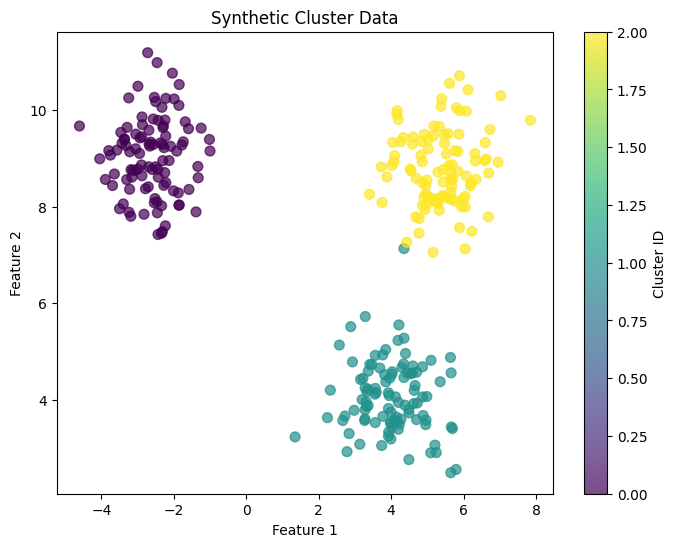

In [85]:
plot_clusters(X, y )

In [67]:
def plot_clusters_with_model(data, labels, model=None):
    """
    Plot clustered data and optionally overlay cluster centers from a PySpark KMeans model.

    Parameters:
    - data: NumPy array of shape (n_samples, n_features)
    - labels: NumPy array of shape (n_samples,) with cluster IDs
    - model: trained PySpark KMeansModel (optional)
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        data[:, 0], data[:, 1],
        c=labels, cmap="viridis",
        s=50, alpha=0.7
    )
    plt.title("Synthetic Cluster Data with KMeans Centers")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(scatter, label="Cluster ID")

    # If a PySpark KMeans model is provided, plot its cluster centers
    if model is not None:
        centers = np.array(model.clusterCenters())
        plt.scatter(
            centers[:, 0], centers[:, 1],
            c="red", marker="X", s=200, edgecolor="black", label="Cluster Centers"
        )
        plt.legend()

    plt.show()

In [68]:
def train_pyspark_kmeans(data, k=3, max_iter=20, seed=42):
    """
    Train a KMeans clustering model in PySpark using generated NumPy data.

    Parameters:
    - data: NumPy array of shape (n_samples, n_features)
    - k: number of clusters
    - max_iter: maximum iterations for KMeans
    - seed: random seed for reproducibility

    Returns:
    - model: trained PySpark KMeansModel
    """
    # Initialize SparkSession
    spark = SparkSession.builder.appName("PySparkClustering").getOrCreate()

    # Convert NumPy data into Spark DataFrame with 'features' column
    rows = [Row(features=Vectors.dense(point)) for point in data]
    df = spark.createDataFrame(rows)

    # Define and fit KMeans model
    kmeans = KMeans(k=k, maxIter=max_iter, seed=seed, featuresCol="features")
    model = kmeans.fit(df)

    return model



In [69]:
# Example usage
#from generate_cluster_data import generate_cluster_data  # assuming your function is saved
# Generate synthetic data
X, y = generate_cluster_data(n_samples=300, n_features=2, n_clusters=3)

# Train PySpark KMeans
model = train_pyspark_kmeans(X, k=3)

# Print cluster centers
# print("Cluster Centers:")
# for center in model.clusterCenters():
#     print(center)


In [70]:
spark = SparkSession.builder.appName("PySparkClustering").getOrCreate()

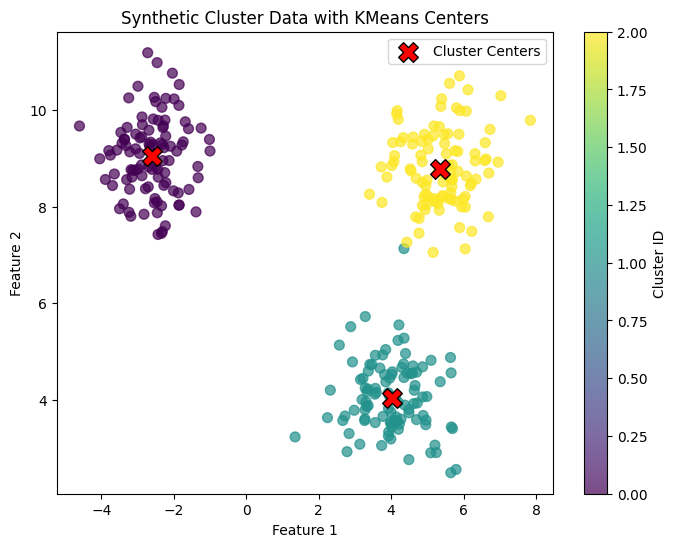

In [72]:
plot_clusters_with_model(X,y, model)

In [73]:
a,  b = generate_cluster_data(n_samples=300, n_features=2, n_clusters=3)

In [76]:
data1 = a, b

In [78]:
data2  = generate_cluster_data(n_samples=300, n_features=2, n_clusters=3)

In [82]:
data2[0]


array([[-1.99104679, 10.23271001],
       [-2.69652032,  8.82697656],
       [-1.24582737,  9.62823391],
       [-2.88477713,  9.44833416],
       [-2.87993178,  8.64170233],
       [-2.31562781,  7.48366193],
       [-3.88913189,  8.5644561 ],
       [-3.31946252,  9.26568399],
       [-3.23561688,  7.88444317],
       [-1.33667861,  8.83366509],
       [-2.45517506,  7.87448758],
       [-2.9447038 ,  9.1030242 ],
       [-3.42999248,  9.31484454],
       [-2.98970857,  8.78093113],
       [-2.99056291, 10.49610868],
       [-2.5199954 ,  8.16811739],
       [-1.85116169,  8.03761121],
       [-2.34210675,  7.44655003],
       [-3.57174646,  9.17177512],
       [-1.91842436,  9.15138075],
       [-2.60171625,  8.77340317],
       [-3.69201522,  8.43841076],
       [-2.87770864,  9.85998391],
       [-2.23430299,  7.603854  ],
       [-2.24993045,  8.7062203 ],
       [-3.05073522,  9.50362716],
       [-1.68439801,  9.75931022],
       [-3.18057164,  8.76691623],
       [-2.24418688,

In [83]:
data2[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])